<a href="https://colab.research.google.com/github/kmkkkp/bigdata_security/blob/main/data237_intervaltimes_dlc_normvsfuzzy_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing pandas
import numpy as np
import pandas as pd
from pandas.core.internals.blocks import F

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import neighbors, datasets
#from sklearn.inspection import DecisionBoundaryDisplay

import sklearn.metrics
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [4]:
#col = [0,1,2,3,4,5,6,7,8,9,10,11]
#col = [1,3,4,5,6,7,8,9,10,11,12,13,14]
col = [3,6,7,11,12,13,14]
Dos= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_data/DoS_dataset_pre.csv',usecols = col)
Fuzzy=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_data/Fuzzy_dataset_pre.csv',usecols = col)
Rpm=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/preprocessing_data/RPM_dataset_pre.csv',usecols = col)
#,usecols = col

In [5]:
print(Fuzzy)

         DLC  Data[2]  Data[3]  Data[7]  Label  interval_prev  interval_next
0          8        0      138        0      0       0.000000       0.001859
1          5        0        5        0      0       0.001859       0.002701
2          8        0        0       21      0       0.002701       0.000239
3          8       16      255        0      0       0.000239       0.000738
4          8        0      255       96      0       0.000738       0.000246
...      ...      ...      ...      ...    ...            ...            ...
3838855    8        0        0        0      0       0.000225       0.000230
3838856    8       33       48       25      0       0.000230       0.000234
3838857    8      154       29        0      0       0.000234       0.000232
3838858    8      127       20       20      0       0.000232       0.000241
3838859    8        0      139        0      0       0.000241       0.000000

[3838860 rows x 7 columns]


In [6]:
Dataset = pd.concat((Dos, Fuzzy, Rpm))

In [7]:
def sampling_func(data, n_sample):
    np.random.seed(10) #실행할 때마다 동일한 샘플을 추출하기 위해 random seed 고정
    N = len(data)
    sample = data.take(np.random.permutation(N)[:n_sample])
    return sample

SampledDataset = Dataset.groupby('Label', group_keys=False).apply(sampling_func, n_sample=250000)

In [8]:
X = SampledDataset.drop(['Label'], axis=1)
y = SampledDataset['Label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size = 0.2, random_state = 1)

In [10]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train.shape,X_test.shape

((800000, 5), (200000, 5))

In [11]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)


In [ ]:
X_train

array([[[ 2.98274631],
        [-0.56979965],
        [-0.07626653],
        [-0.07222664],
        [-0.29379779]],

       [[-0.20942697],
        [ 1.28803597],
        [ 1.35091951],
        [ 0.05200637],
        [-0.32938156]],

       [[ 2.92223117],
        [ 0.62388217],
        [ 0.38116489],
        [-0.10414922],
        [ 1.72055846]],

       ...,

       [[-0.75406317],
        [-1.00060212],
        [-0.98198075],
        [ 4.63433743],
        [ 2.32306194]],

       [[-0.73893439],
        [-1.00060212],
        [-0.98198075],
        [-0.39168295],
        [-0.33797492]],

       [[-0.75406317],
        [-1.00060212],
        [-0.98198075],
        [-0.39410307],
        [-0.37464799]]])

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(6, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 32)             128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 32)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
Total params: 1,236
Trainable params: 1,236
Non-trainable params: 0
______________________________________________________

In [14]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/100
50000/50000 [==============================] - 144s 3ms/step - loss: 0.2437 - accuracy: 0.9030 - val_loss: 0.1928 - val_accuracy: 0.9222
Epoch 2/100
50000/50000 [==============================] - 140s 3ms/step - loss: 0.1873 - accuracy: 0.9232 - val_loss: 0.2029 - val_accuracy: 0.9268
Epoch 3/100
50000/50000 [==============================] - 154s 3ms/step - loss: 0.1767 - accuracy: 0.9265 - val_loss: 0.1651 - val_accuracy: 0.9281
Epoch 4/100
50000/50000 [==============================] - 152s 3ms/step - loss: 0.1696 - accuracy: 0.9285 - val_loss: 0.1593 - val_accuracy: 0.9287
Epoch 5/100
50000/50000 [==============================] - 133s 3ms/step - loss: 0.1648 - accuracy: 0.9302 - val_loss: 0.1643 - val_accuracy: 0.9430
Epoch 6/100
50000/50000 [==============================] - 133s 3ms/step - loss: 0.1616 - accuracy: 0.9327 - val_loss: 0.1682 - val_accuracy: 0.9270
Epoch 7/100
50000/50000 [==============================] - 132s 3ms/step - loss: 0.1552 - accuracy: 0.9352

Text(0.5, 1.0, 'Training VS Validation Accuracy')

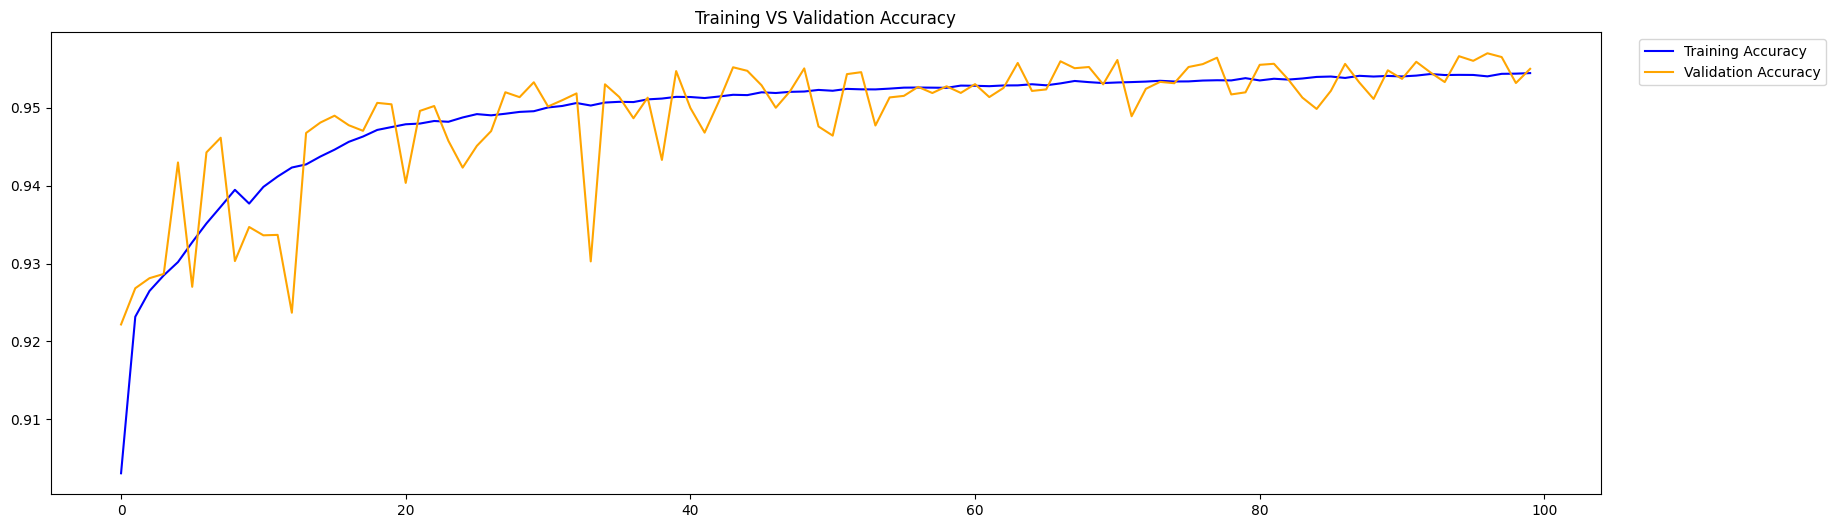

In [15]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs=range(len(acc)) 
plt.figure(figsize=(20, 6))

plt.plot(epochs, acc,color='blue', label='Training Accuracy')
plt.plot(epochs, val_acc,color='orange', label='Validation Accuracy')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right')
plt.title('Training VS Validation Accuracy')


Text(0.5, 1.0, 'Training VS Validation Los')

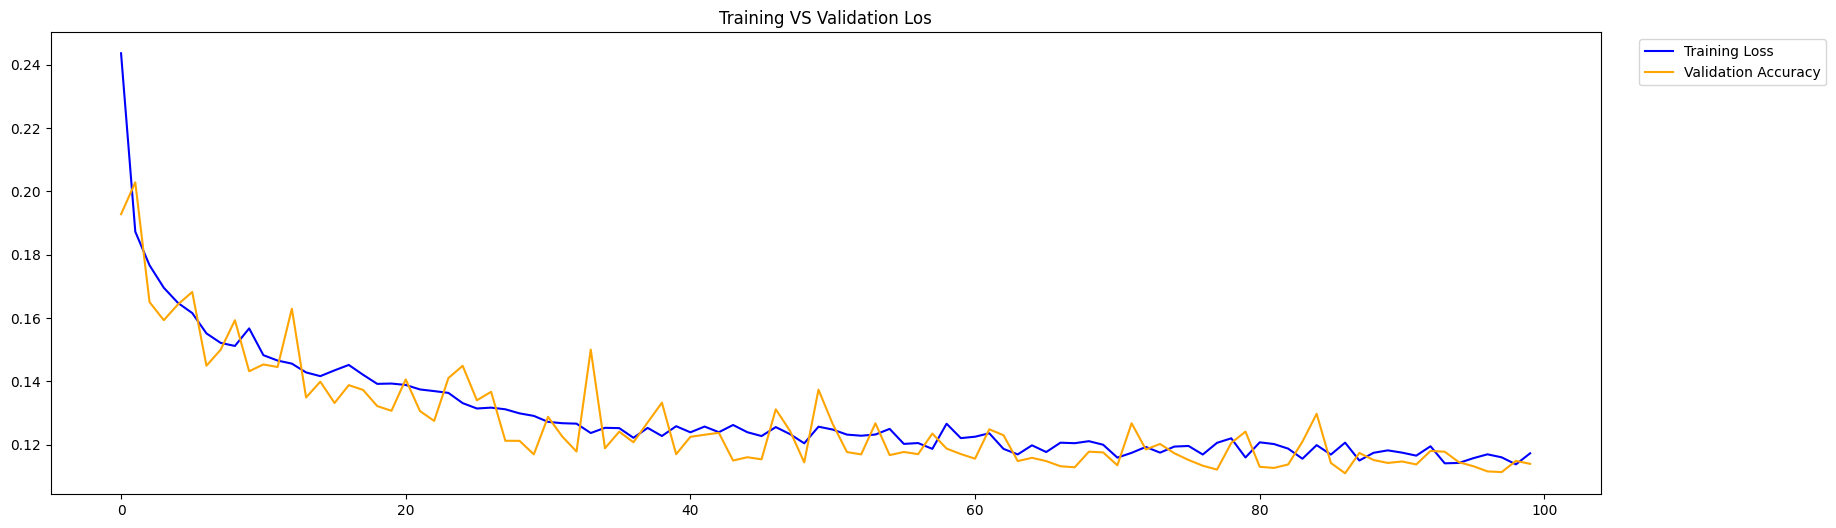

In [26]:
los=history.history['loss']
val_acc=history.history['val_loss']

epochs=range(len(los)) 
plt.figure(figsize=(20, 6))

plt.plot(epochs, acc,color='blue', label='Training Loss')
plt.plot(epochs, val_acc,color='orange', label='Validation Accuracy')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right')
plt.title('Training VS Validation Los')

In [18]:
import seaborn
y_pred = model.predict(X_test)
print(y_pred)

6250/6250 [==============================] - 17s 3ms/step
[[9.9315572e-01 6.7208670e-03 1.2331647e-04 9.5369788e-12]
 [9.9998623e-01 2.0736039e-14 1.3684265e-05 1.0853246e-32]
 [1.7956417e-13 0.0000000e+00 9.9999994e-01 0.0000000e+00]
 ...
 [6.8084431e-22 0.0000000e+00 9.9999994e-01 0.0000000e+00]
 [9.9102536e-14 0.0000000e+00 9.9999994e-01 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 9.9999994e-01 5.7498010e-36]]


In [19]:
y_pred_label = np.argmax(y_pred, axis=1)

print(y_pred_label)
y_test=np.squeeze(y_test.values)

[0 0 2 ... 2 2 2]


In [20]:
cm = confusion_matrix(y_test, y_pred_label)

cm_matrix = pd.DataFrame(data=cm, columns=['Benign', 'Dos', 'Fuzzy','Rpm'], 
                                 index=['Benign', 'Dos', 'Fuzzy','Rpm'])

print(cm)

[[43668  5743   589     0]
 [ 2384 47616     0     0]
 [  273     1 49721     5]
 [    0     0     0 50000]]


<Axes: >

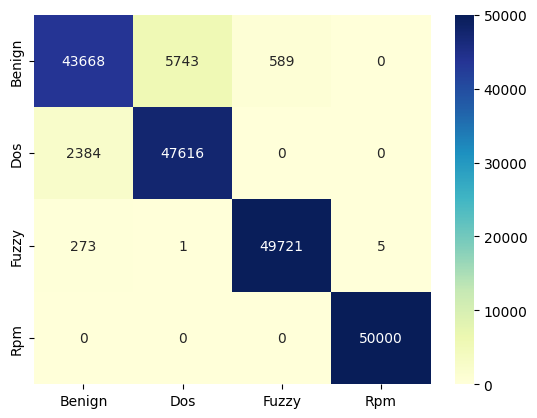

In [21]:
import seaborn
seaborn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [64]:
correct = np.where(y_pred_label==y_test)[0]

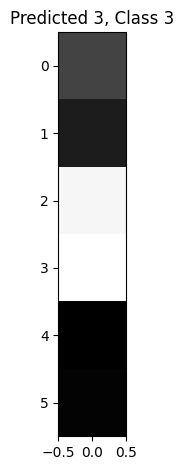

In [65]:

for i, correct in enumerate(correct[:10]):
    plt.plot(10, 1,i+1)
    plt.imshow(X_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_label[correct], y_test[correct]))
    plt.tight_layout()

# **Unsupervised**

In [ ]:
from sklearn.ensemble import IsolationForest

#https://www.kaggle.com/code/gauravsahani/anomaly-detection-with-isolation-forest
#create forest
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

Text(0, 0.5, 'Frequency')

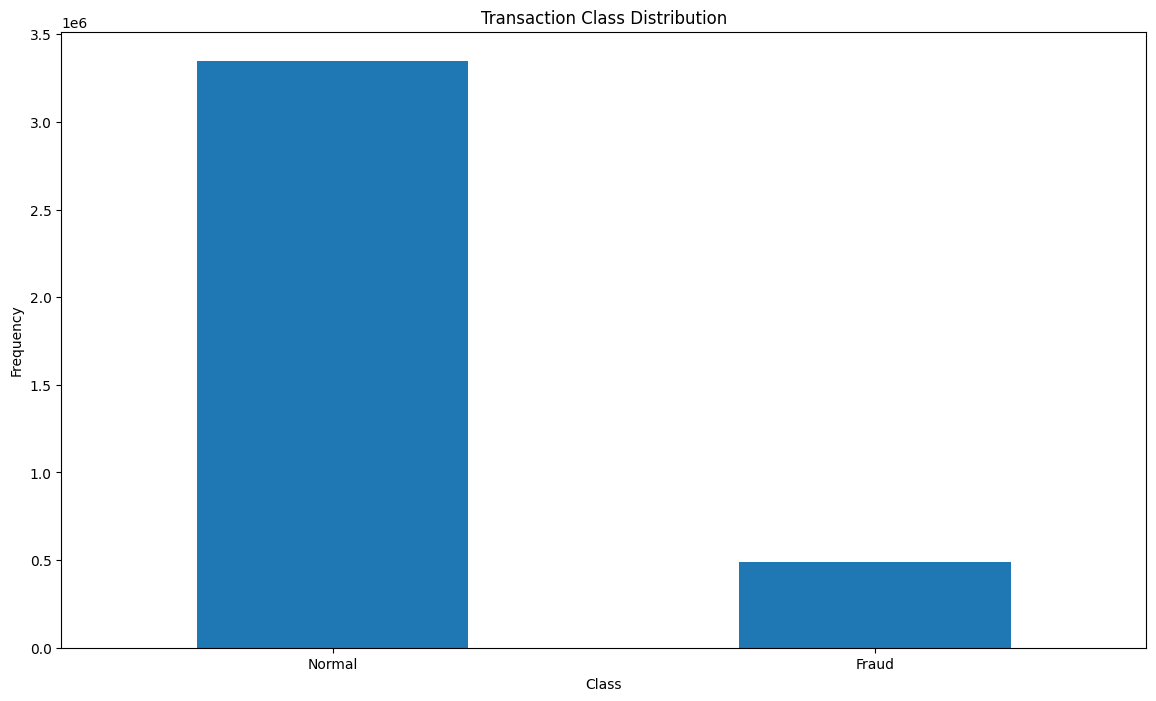

In [ ]:
count_classes = pd.value_counts(Fuzzy['Label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
## Get the Fraud and the normal dataset 
fraud = Fuzzy[Fuzzy['Label']==2]
normal = Fuzzy[Fuzzy['Label']==0]

In [ ]:
print(fraud.shape,normal.shape)

# Take some sample of the data

df1= Fuzzy.sample(frac = 0.1,random_state=1)
df1.shape

(491847, 13) (3347013, 13)


(383886, 13)

In [ ]:
Fuzzy.shape

(3838860, 13)

In [ ]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = df1[df1['Label']==2]
Valid = df1[df1['Label']==0]
print(Fraud)
outlier_fraction = len(Fraud)/float(len(Valid))

            Timestamp  DLC  Data[0]  Data[1]  Data[2]  Data[3]  Data[4]  \
698711   1.478196e+09    8      211       78      113       86      136   
440368   1.478196e+09    8       77      136       58      252      140   
277232   1.478196e+09    8      148      180       91      241      244   
2694874  1.478198e+09    8       96       15       77      217        1   
1716308  1.478197e+09    8        8      151       94       69       45   
...               ...  ...      ...      ...      ...      ...      ...   
2153658  1.478197e+09    8      237       27      177      231      233   
2443943  1.478198e+09    8      169      143       47       11      229   
983903   1.478196e+09    8      220       77      182       18      245   
1121365  1.478197e+09    8      209      238      186      101       63   
2110251  1.478197e+09    8      115      199      207       12      167   

         Data[5]  Data[6]  Data[7]  Label  interval_prev  interval_next  
698711        30      250

In [ ]:
#Create independent and Dependent Features
columns = df1.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Label"
# Define a random state 
state = np.random.RandomState(42)

X = df1[columns]
Y = df1[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(383886, 13)
(383886,)


In [ ]:
##Define the outlier detection methods
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [ ]:
print(outlier_fraction)

0.1472262649385424


In [ ]:
import seaborn
from sklearn.metrics import confusion_matrix

n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Isolation Forest":
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 2
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

    cm = confusion_matrix(Y, y_pred)

    cm_matrix = pd.DataFrame(data=cm, columns=['0','2'], 
                                 index=['0', '2'])

    seaborn.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest: 12211
Accuracy Score :
0.9681910775594839
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    334621
           2       0.83      0.95      0.88     49265

    accuracy                           0.97    383886
   macro avg       0.91      0.96      0.93    383886
weighted avg       0.97      0.97      0.97    383886

Local Outlier Factor: 97025
Accuracy Score :
0.747255695701328
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.84      0.85    334621
           2       0.08      0.09      0.08     49265

    accuracy                           0.75    383886
   macro avg       0.47      0.47      0.47    383886
weighted avg       0.76      0.75      0.75    383886



# **CNN**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    steps_per_epoch = 25
                    ,epochs=20
                    ,validation_steps=2
                    ,verbose=1
                    ,validation_data=(X_test,y_test))

Epoch 1/20
25/25 [==============================] - 52s 2s/step - loss: -0.5146 - accuracy: 0.3389 - val_loss: 0.4435 - val_accuracy: 0.3456
Epoch 2/20
25/25 [==============================] - 45s 2s/step - loss: -2.9424 - accuracy: 0.3627 - val_loss: -0.0752 - val_accuracy: 0.2580
Epoch 3/20
25/25 [==============================] - 44s 2s/step - loss: -6.2017 - accuracy: 0.3740 - val_loss: -0.9580 - val_accuracy: 0.1884
Epoch 4/20
25/25 [==============================] - 42s 2s/step - loss: -11.3198 - accuracy: 0.3816 - val_loss: -2.4108 - val_accuracy: 0.1919
Epoch 5/20
25/25 [==============================] - 43s 2s/step - loss: -18.5644 - accuracy: 0.3864 - val_loss: -4.6979 - val_accuracy: 0.2201
Epoch 6/20
25/25 [==============================] - 44s 2s/step - loss: -27.8586 - accuracy: 0.3923 - val_loss: -8.0375 - val_accuracy: 0.2325
Epoch 7/20
25/25 [==============================] - 43s 2s/step - loss: -39.1369 - accuracy: 0.3987 - val_loss: -12.6666 - val_accuracy: 0.2171
Ep

Text(0.5, 1.0, 'Training VS Validation Accuracy')

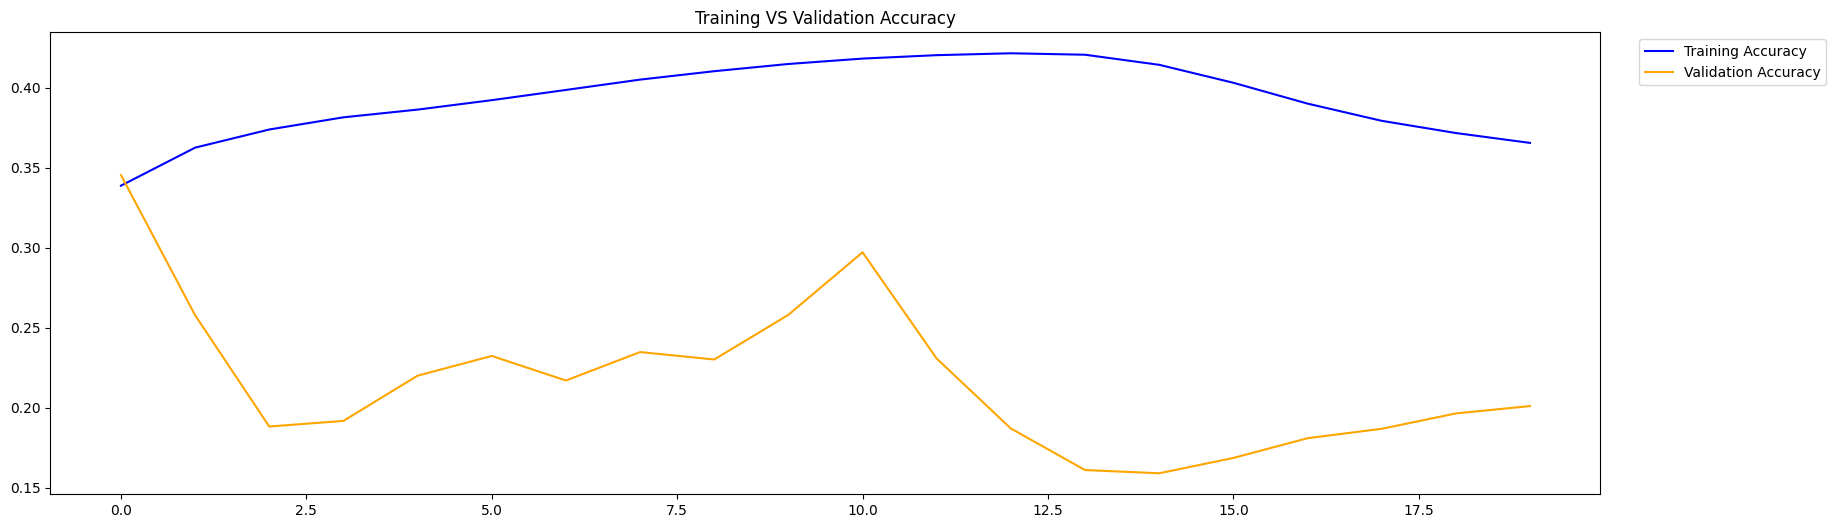

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs=range(len(acc)) 
plt.figure(figsize=(20, 6))

plt.plot(epochs, acc,color='blue', label='Training Accuracy')
plt.plot(epochs, val_acc,color='orange', label='Validation Accuracy')
plt.legend(bbox_to_anchor=(1.15, 1.0), loc='upper right')
plt.title('Training VS Validation Accuracy')

In [ ]:
import seaborn as sns
sns.countplot(anomaly.Class)
plt.show()
print(anomaly.Class.value_counts())

In [ ]:
timedelta = pd.to_timedelta(anomaly['Time'], unit='s')
anomaly['Time_hour'] = (timedelta.dt.components.hours).astype(int)

plt.figure(figsize=(12,5))
sns.distplot(anomaly[anomaly['Class'] == 0]["Time_hour"], color='b')
sns.distplot(anomaly[anomaly['Class'] == 1]["Time_hour"], color='r')
plt.title('Fraud and Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

# **CNN hyperparam tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(5, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])
    return model

In [ ]:
import numpy
seed = 7
numpy.random.seed(seed)
batch_size = 16
epochs = 20

model_CV = KerasClassifier(build_fn=create_model, epochs=epochs, 
                           batch_size=batch_size, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

<ipython-input-31-c6c5a27e2e31>:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_CV = KerasClassifier(build_fn=create_model, epochs=epochs,
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/20
50000/50000 [==============================] - 97s 2ms/step - loss: 0.3601 - accuracy: 0.8570
Epoch 2/20
50000/50000 [==============================] - 97s 2ms/step - loss: 0.2916 - accuracy: 0.8874
Epoch 3/20
50000/50000 [==============================] - 97s 2ms/step - loss: 0.2784 - accuracy: 0.8919
Epoch 4/20
50000/50000 [==============================] - 97s 2ms/step - loss: 0.2694 - accuracy: 0.8950
Epoch 5/20
50000/50000 [==============================] - 95s 2ms/step - loss: 0.2629 - accuracy: 0.8973
Epoch 6/20
50000/50000 [==============================] - 96s 2ms/step - loss: 0.2572 - accuracy: 0.8993
Epoch 7/20
50000/50000 [==============================] - 95s 2ms/step - loss: 0.2515 - accuracy: 0.9009
Epoch 8/20
50000/50000 [==============================] - 97s 2ms/step - loss: 0.2464 - accuracy: 0.9015
Epoch 9/20
50000/50000 [==============================] - 100s 2ms/step - loss: 0.2427 - accuracy: 0.9020
Epoch 10/20
50000/50000 [=============================

In [ ]:
print(f'Best Accuracy for {grid_result.best_score_} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f' mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9092150131861368 using {'init_mode': 'glorot_uniform'}
 mean=0.9089, std=0.001683 using {'init_mode': 'uniform'}
 mean=0.9057, std=0.00368 using {'init_mode': 'lecun_uniform'}
 mean=0.9057, std=0.001923 using {'init_mode': 'normal'}
 mean=0.9085, std=0.002379 using {'init_mode': 'zero'}
 mean=0.9055, std=0.002236 using {'init_mode': 'glorot_normal'}
 mean=0.9092, std=0.001243 using {'init_mode': 'glorot_uniform'}
 mean=0.9083, std=0.001747 using {'init_mode': 'he_normal'}
 mean=0.9049, std=0.003151 using {'init_mode': 'he_uniform'}
